kcat = 8.745536557642291 ± 1.1110561918644506
ksp = 0.2947802811356574 ± 0.04161355809681909
Km = 29.667983638354727 ± 5.634437927485854


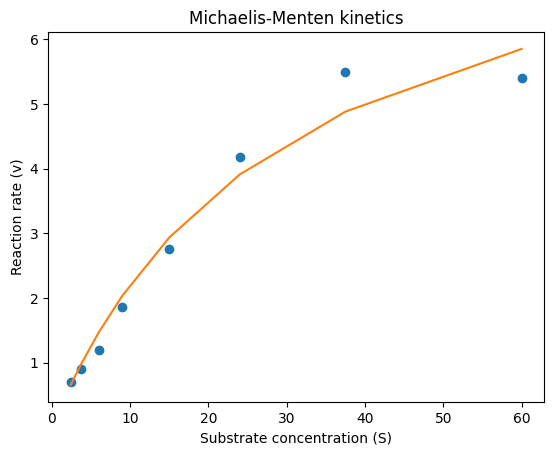

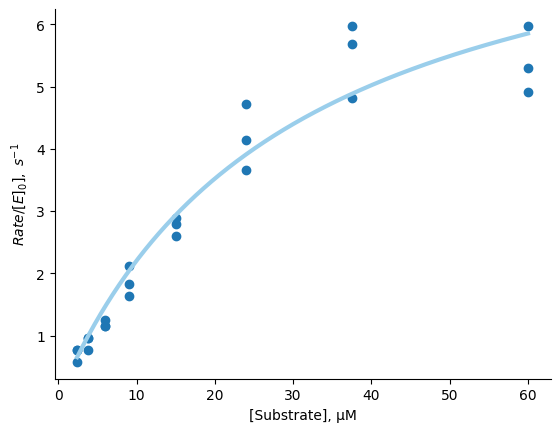

In [2]:
# To run this code, click the "play" button to the left or hit shift+enter
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math # Import the math module

# Define the Modified Michaelis-Menten equation
def mm_equation(S, kcat, ksp):
    return kcat / (1+(kcat/(ksp * S)))

#Uploaded average data file and full data file to session storage, then read csv file to import data
full_data_df = pd.read_csv('kinetics full.csv') # Replace 'kinetics full.csv' with the actual filename
Sf = full_data_df['[Sub]'] # In example file, the correspoinding column is titled '[Sub]'
vf = full_data_df['v/E'] # In example file, the correspoinding column is titled 'v/E'
fit_data_df=pd.read_csv('kinetics average.csv') # Replace 'kinetics average.csv' with the actual filename
S=fit_data_df['[Sub]'] # In example file, the correspoinding column is titled '[Sub]'
v=fit_data_df['avg v/E'] # In example file, the correspoinding column is titled 'avg v/E'

# Fit the data to the Michaelis-Menten equation
# popt - optimized parameters
# pcov - 2D matrix of the covariance for the curve fit
# Extract the fitted parameters
popt, pcov = curve_fit(mm_equation, S, v)
kcat = popt[0]
ksp = popt[1]
Km = popt[0] / popt[1]

# Extract one standard deviation for each parameter
# Report Kinetic Parameters
stdev = np.sqrt(np.diag(pcov))
error_Km = Km * math.sqrt((stdev[0]/kcat)**2 + (stdev[1]/ksp)**2)
print('kcat =', kcat, '±', stdev[0])
print('ksp =', ksp, '±', stdev[1])
print('Km =', kcat/ksp, '±', error_Km)

# Simple plot of the average data and the fitted curve
plt.plot(S, v, 'o')
plt.plot(S, mm_equation(S, kcat, ksp))
plt.xlabel("Substrate concentration (S)")
plt.ylabel("Reaction rate (v)")
plt.title("Michaelis-Menten kinetics")
plt.show()

# Produce a more attractive plot of the data, and create files of the figure. These files will be saved to the session storage.
smooth_x = np.linspace(np.min(S), np.max(S), 1000) #this smooths out the plotted line
smooth_y = mm_equation(smooth_x, kcat, ksp)
plt.plot(Sf, vf, 'o')
plt.plot(smooth_x, smooth_y, '#9ACEEB',linewidth=3)
SIZE_DEFAULT = 8
SIZE_LARGE = 14
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.xlabel('[Substrate], µM') # x-axis label
plt.ylabel('$Rate/[E]_0],$ $s^{-1}$') # y-axis label using LaTeX
ax = plt.gca()
ax.spines['top'].set_visible(False) #removes top border
ax.spines['right'].set_visible(False) #removes right border
plt.savefig('plot.svg') #change name of file as desired
plt.savefig('plot.pdf') #change name of file as desired
plt.show()

kcat hill = 6.722242367323842 ± 0.9353043388682128
kspH = 115.84467482974514 ± 46.57994194161446
Khalf = 0.058028065400532236 ± 0.024689890235181693
n = 1.383223867838983 ± 0.26850905018632976
kcat SubInh = 1362907.1630905606 ± 57725062890.975
ksp SubInh = 8736334557700.994 ± 7.390131085558135e+17
KI = 0.0004260338012624425 ± 18.09472287880844
Km SubInh = 1.5600446091995997e-07 ± 18.09472287880844
Slope (ksp)= 0.09065505083063469 ± 0.015370178231825559
Intercept = 1.0234197295688037


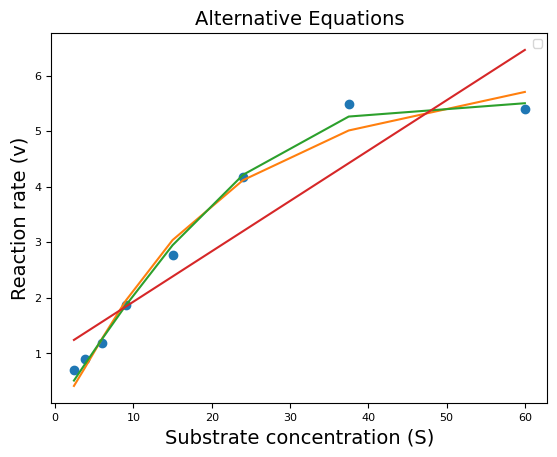

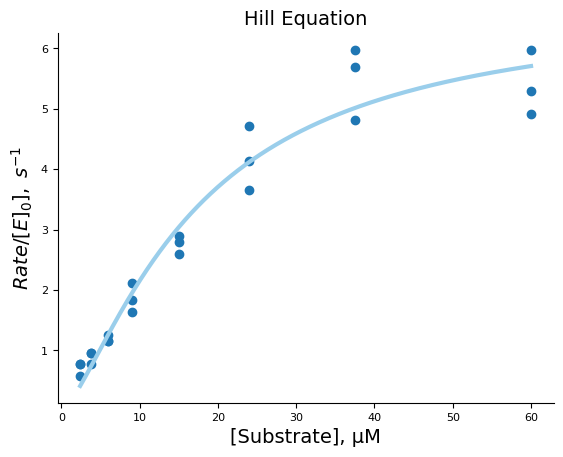

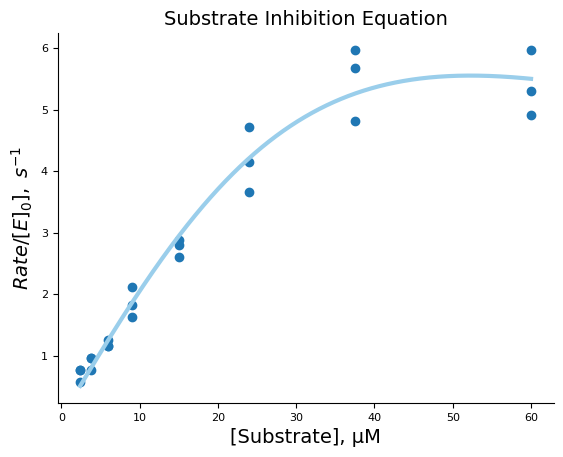

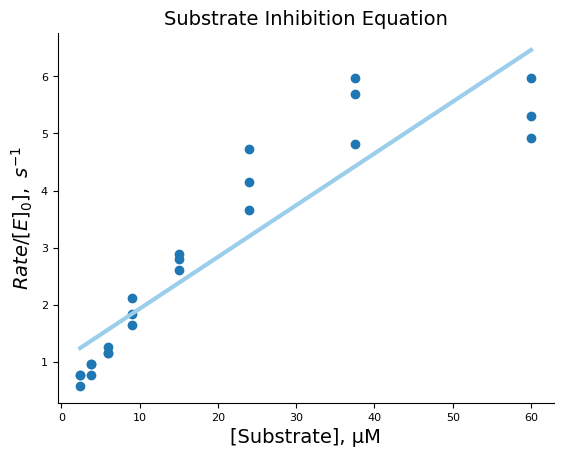

In [18]:
# Define the alternative equations
def hill_equation(S, kcat_hill, kspH_hill, n_hill):
    return (kcat_hill*(S**n_hill))/((kspH_hill/kcat_hill)**n_hill + S**n_hill)
def SubInh_equation(S, kcat_SubInh, ksp_SubInh, KI):
    return (kcat_SubInh*(S))/((ksp_SubInh/kcat_SubInh) + S * (1 + S/KI))

# Fit the data to the alternative equations
popt_hill, pcov_hill = curve_fit(hill_equation, S, v)
kcat_hill = popt_hill[0]
kspH_hill = popt_hill[1]
n_hill = popt_hill[2]
khalf = kcat_hill/kspH_hill
initial_guess = [8, 0.3, 50] # Provide initial guess for SubInh_equation
lower_bounds = [0, 0, 10]  # Provide lower bounds for kcat_SubInh, ksp_SubInh, and KI
upper_bounds = [100, 1000, np.inf]  # Provide upper bounds
popt_SubInh, pcov_SubInh = curve_fit(SubInh_equation, S, v, p0=initial_guess, maxfev=10000)
kcat_SubInh = popt_SubInh[0]
ksp_SubInh = popt_SubInh[1]
KI = popt_SubInh[2]
Km_SubInh = kcat_SubInh/ksp_SubInh
LinearFit = np.polyfit(S, v, 1)
slope = LinearFit[0]
intercept = LinearFit[1]
residuals = v - (slope * S + intercept)
n = len(S)
std_err_slope = np.sqrt(np.sum(residuals**2) / (n - 2)) / np.sqrt(np.sum((S - np.mean(S))**2))


# Report Kinetic Parameters
stdev_hill = np.sqrt(np.diag(pcov_hill))
stdev_SubInh = np.sqrt(np.diag(pcov_SubInh))
error_khalf = khalf * math.sqrt((stdev_hill[0]/kcat_hill)**2 + (stdev_hill[1]/kspH_hill)**2)
print('kcat hill =', kcat_hill, '±', stdev_hill[0])
print('kspH =', kspH_hill, '±', stdev_hill[1])
print('Khalf =', khalf, '±', error_khalf)
print('n =', n_hill, '±', stdev_hill[2])
print('kcat SubInh =', kcat_SubInh, '±', stdev_SubInh[0])
print('ksp SubInh =', ksp_SubInh, '±', stdev_SubInh[1])
print('KI =', KI_SubInh, '±', stdev_SubInh[2])
print('Km SubInh =', kcat_SubInh/ksp_SubInh, '±', stdev_SubInh[2])
print('Slope (ksp)=', slope, '±', std_err_slope)
print('Intercept =', intercept)

# Simple plot of the average data and the fitted curve
plt.plot(S, v, 'o')
plt.plot(S, hill_equation(S, kcat_hill, kspH_hill, n_hill))
plt.plot(S, SubInh_equation(S, kcat_SubInh, ksp_SubInh, KI))
plt.plot(S, slope * S + intercept)
plt.xlabel("Substrate concentration (S)")
plt.ylabel("Reaction rate (v)")
plt.title("Alternative Equations")
plt.legend()
plt.show()

# Produce a more attractive plot of the data, and create files of the figure. These files will be saved to the session storage.
smooth_x = np.linspace(np.min(S), np.max(S), 1000) #this smooths out the plotted line
smooth_y_hill = hill_equation(smooth_x, kcat_hill, kspH_hill, n_hill)
smooth_y_SubInh = SubInh_equation(smooth_x, kcat_SubInh, ksp_SubInh, KI)
plt.plot(Sf, vf, 'o')
plt.plot(smooth_x, smooth_y_hill, '#9ACEEB',linewidth=3)
SIZE_DEFAULT = 8
SIZE_LARGE = 14
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.xlabel('[Substrate], µM') # x-axis label
plt.ylabel('$Rate/[E]_0],$ $s^{-1}$') # y-axis label using LaTeX
plt.title("Hill Equation")
ax = plt.gca()
ax.spines['top'].set_visible(False) #removes top border
ax.spines['right'].set_visible(False) #removes right border
plt.savefig('Hill plot.svg') #change name of file as desired
plt.savefig('Hill plot.pdf') #change name of file as desired
plt.show()

plt.plot(Sf, vf, 'o')
plt.plot(smooth_x, smooth_y_SubInh, '#9ACEEB',linewidth=3)
SIZE_DEFAULT = 8
SIZE_LARGE = 14
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.xlabel('[Substrate], µM') # x-axis label
plt.ylabel('$Rate/[E]_0],$ $s^{-1}$') # y-axis label using LaTeX
plt.title("Substrate Inhibition Equation")
ax = plt.gca()
ax.spines['top'].set_visible(False) #removes top border
ax.spines['right'].set_visible(False) #removes right border
plt.savefig('Sub Inh plot.svg') #change name of file as desired
plt.savefig('Sub Inh plot.pdf') #change name of file as desired
plt.show()

plt.plot(Sf, vf, 'o')
plt.plot(S, slope * S + intercept,'#9ACEEB',linewidth=3)
SIZE_DEFAULT = 8
SIZE_LARGE = 14
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.xlabel('[Substrate], µM') # x-axis label
plt.ylabel('$Rate/[E]_0],$ $s^{-1}$') # y-axis label using LaTeX
plt.title("Substrate Inhibition Equation")
ax = plt.gca()
ax.spines['top'].set_visible(False) #removes top border
ax.spines['right'].set_visible(False) #removes right border
plt.savefig('Linear plot.svg') #change name of file as desired
plt.savefig('Linear plot.pdf') #change name of file as desired
plt.show()